In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Single-thread vs Multi-thread as function of Table Count 

In the example below in each case the data was split into 4 folds which  were in the case of multi-threading distributed to 4 worker processes

In [2]:
xdata = np.log10(np.array([100,200,500,1000,2000,4000,5000,7500,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,20000000,50000000]))
ydata = np.array([3.04,3.018,2.90,3.027,2.95,3.016,3.046,1.10,0.875,0.952,1.16,1.37,1.73,2.37,2.79,3.17,3.50,3.597,3.67,3.876])

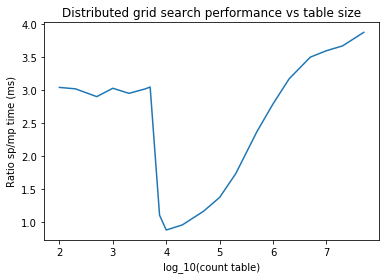

In [3]:
plt.xlabel('log_10(count table)')
plt.ylabel('Ratio sp/mp time (ms)')
plt.title('Distributed grid search performance vs table size')
plt.plot(xdata,ydata)

In [4]:
xdatalg = np.log10(np.array([100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,20000000,50000000]))
ydatasinglelg = np.log10(np.array([4.64,5.54,6.65,8.90,13.30,26.20,49.22,101.06,255,579,1305,3617,7564,15494,39655,80308,164810,452683]))
ydatamultilg = np.log10(np.array([1.44,1.80,2.29,2.94,4.51,8.60,56.24,96.17,219,424,753,1523,2713,4886,11326,22320,44629,116790]))

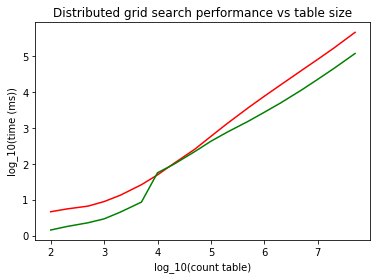

In [5]:
plt.xlabel('log_10(count table)')
plt.ylabel('log_10(time (ms))')
plt.title('Distributed grid search performance vs table size')
plt.plot(xdatalg,ydatasinglelg,'r')
plt.plot(xdatalg,ydatamultilg,'g')

In [6]:
xdata = np.log10(np.array([100,1000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,20000000,50000000]))
ydatasingle = np.array([4.65,8.94,49.5,95.6,254,584.8,1312,3623,7564,15794,39655,80308,164810,452683])
ydatamulti = np.array([2.5,5,42,82,214,440,726,1552,2713,4886,11326,23127,44629,116790])

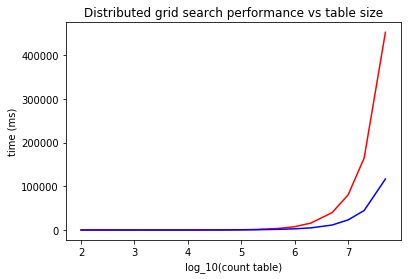

In [7]:
plt.xlabel('log_10(count table)')
plt.ylabel('time (ms)')
plt.title('Distributed grid search performance vs table size')
plt.plot(xdata,ydatasingle,'r')
plt.plot(xdata,ydatamulti,'b')

### ElasticNet execution time vs number of rows

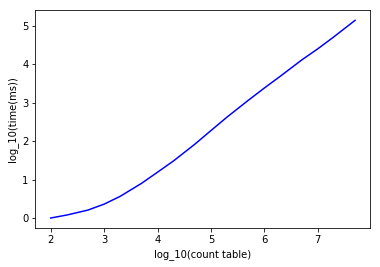

In [17]:
nprocess = np.log10(np.array([100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,20000000,50000000]))
time = np.log10(np.array([0.41,0.49,0.66,0.94,1.5,3.25,6.35,12.51,33.92,76.49,171.31,467.64,975.4,1984.5,5212,10161,20816,55918]))
plt.xlabel('log_10(count table)')
plt.ylabel('log_10(time(ms))')
plt.plot(nprocess,time-time[0],'b')

The graph above is very similar to that of the single-process execution which was seen above. To compare these I have adjusted the initial start point such that both start at 0 in order to check the increase in rate of both graphs

In [18]:
adj_time = time-time[0]
adj_singleprocess = ydatasinglelg-ydatasinglelg[0]

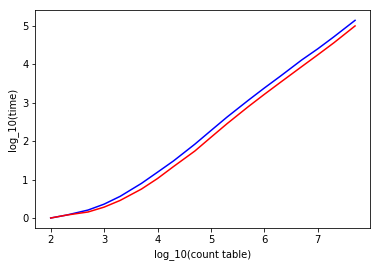

In [19]:
plt.xlabel('log_10(count table)')
plt.ylabel('log_10(time)')
plt.plot(nprocess,adj_time,'b')
plt.plot(xdatalg,adj_singleprocess,'r')

### Lasso Regression vs. time

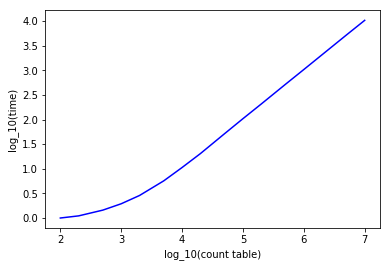

In [20]:
nprocess = np.log10(np.array([100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000]))
time = np.log10(np.array([0.38,0.42,0.55,0.74,1.09,2.162,4.034,7.735,19.674,39.63,78.78,198.14,394.9,791.5,1983.7,3944.3]))
plt.xlabel('log_10(count table)')
plt.ylabel('log_10(time)')
plt.plot(nprocess,time-time[0],'b')

### Execution time vs No. Worker instances

The time for each run of the following is averaged to a single execution with the tables in each case of length 1,000,000 rows and 2 columns

In [12]:
nprocess = np.array([2,3,4,5,6,7,8,9,10,11,12,20,40,75,100,150,200])
time = np.array([1.81,2.256,2.735,3.265,3.79,4.30,4.79,5.371,5.725,6.259,6.81,10.55,19.713,36.64,48.97,73.33,98.46])

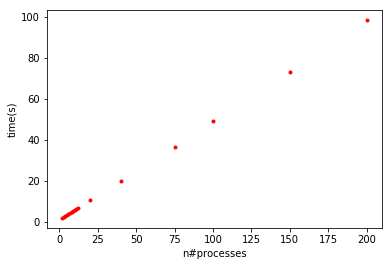

In [13]:
plt.xlabel('n#processes')
plt.ylabel('time(s)')
plt.plot(nprocess,time,'r.')

In [14]:
from scipy.stats import linregress
data=linregress(time,nprocess)
print('slope: ',str(data[0]))
print('intercept: ',str(data[1]))
print('rvalue: ',str(data[2]))

slope:  2.060733627872529
intercept:  -1.6400023257292986
rvalue:  0.9999518157390447


### Peached cross validation benchmarking

The initial section of this benchmarking shows the performance for a table of 100,000 rows with increasing numbers of folds being sent to the worker processes for different numbers of slaves

In [68]:
folds=2+np.arange(15)
extime0=np.array([294,479,615,728,877,1037,1194,1303,1499,1677,1858,1933,2103,2240,2449])
extime1=np.array([266,375,506,643,763,910,1043,1161,1285,1406,1564,1660,1797,1936,2053])
extime2=np.array([189,333,356,505,521,679,697,844,864,1012,1046,1183,1224,1353,1373])
extime4=np.array([190,344,424,532,602,734,811,872,987,1097,1202,1243,1335,1464,1563])
extime8=np.array([190,333,440,569,654,790,853,966,1047,1157,1246,1296,1365,1446,1529])

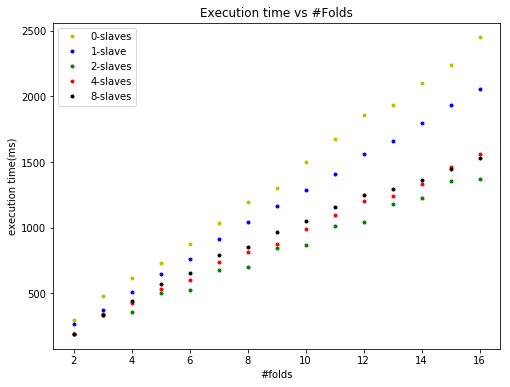

In [76]:
plt.figure(figsize=(8,6))
plt.xlabel('#folds')
plt.ylabel('execution time(ms)')
plt.title('Execution time vs #Folds')
plt.plot(folds,extime0,'y.',label='0-slaves')
plt.plot(folds,extime1,'b.',label='1-slave')
plt.plot(folds,extime2,'g.',label='2-slaves')
plt.plot(folds,extime4,'r.',label='4-slaves')
plt.plot(folds,extime8,'k.',label='8-slaves')
plt.legend()
plt.show()

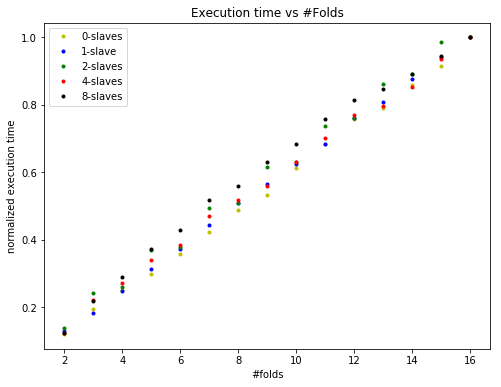

In [70]:
plt.figure(figsize=(8,6))
plt.xlabel('#folds')
plt.ylabel('normalized execution time')
plt.title('Execution time vs #Folds')
plt.plot(folds,extime0/max(extime0),'y.',label='0-slaves')
plt.plot(folds,extime1/max(extime1),'b.',label='1-slave')
plt.plot(folds,extime2/max(extime2),'g.',label='2-slaves')
plt.plot(folds,extime4/max(extime4),'r.',label='4-slaves')
plt.plot(folds,extime8/max(extime8),'k.',label='8-slaves')
plt.legend()
plt.show()

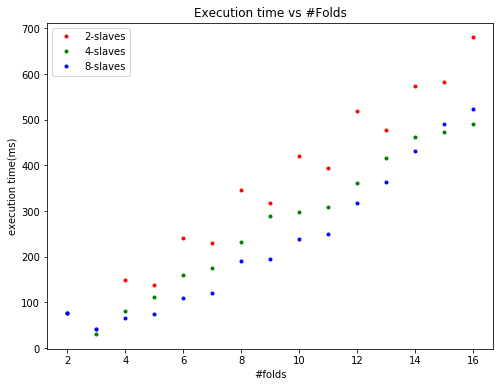

In [77]:
plt.figure(figsize=(8,6))
plt.xlabel('#folds')
plt.ylabel('execution time(ms)')
plt.title('Execution time vs #Folds')
plt.plot(folds,extime1-extime2,'r.',label='2-slaves')
plt.plot(folds,extime1-extime4,'g.',label='4-slaves')
plt.plot(folds,extime1-extime8,'b.',label='8-slaves')
#plt.plot(folds,extime1,'r.',label='1-slave')
plt.legend()
plt.show()

In [96]:
processes=np.array([1,2,4,6,8])
extime2=np.array([266,189,190,188,190])
extime4=np.array([506,356,424,403,440])
extime8=np.array([1043,697,811,872,853])
extime16=np.array([2053,1373,1563,1597,1529])

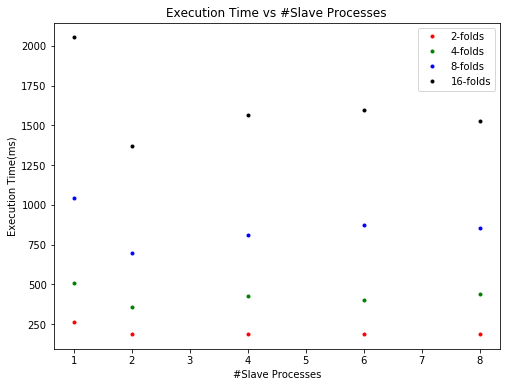

In [97]:
plt.figure(figsize=(8,6))
plt.xlabel('#Slave Processes')
plt.ylabel('Execution Time(ms)')
plt.title('Execution Time vs #Slave Processes')
plt.plot(processes,extime2,'r.',label='2-folds')
plt.plot(processes,extime4,'g.',label='4-folds')
plt.plot(processes,extime8,'b.',label='8-folds')
plt.plot(processes,extime16,'k.',label='16-folds')
plt.legend()
plt.show()

---

### Increasing table size with fixed folds but varying numbers of slaves

Here the ratio of the time for execution of 10 fold grid search cross validation on increasing numbers of slaves. In each case the size of the table is increased up to 10,000,000 rows.

The validation in each case checks for the best score received on cross validation of;

```q
q)py:.p.import[`sklearn.linear_model][`:ElasticNet]
q)dict:`alpha`l1_ratio!(0.75;0.25 0.5 0.75)
```

The number of workers used were 2,3,5,8,10

In [100]:
nrows = np.log10(np.array([100,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]))
slaves2 = np.array([1.66,1.94,1.49,1.48,1.45,1.45,1.51,1.60,1.79,1.86])
slaves3 = np.array([2.47,2.42,1.43,1.03,1.22,1.35,1.71,1.92,2.14,2.19])
slaves5 = np.array([3.03,2.76,1.18,0.94,1.14,1.21,1.94,2.33,2.84,3.02])
slaves8 = np.array([3.22,3.33,1.03,0.74,1.06,1.22,2.00,2.36,2.93,3.01])
slaves10 = np.array([3.19,3.15,0.74,0.68,1.09,1.23,2.05,2.53,3.09,3.15])

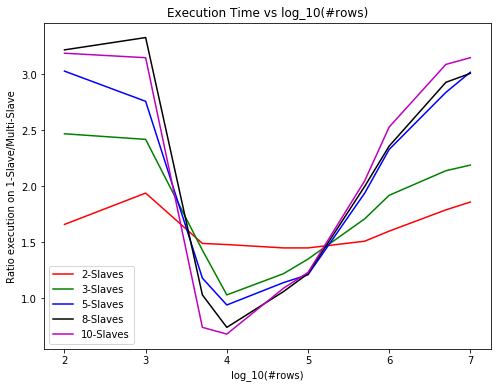

In [104]:
plt.figure(figsize=(8,6))
plt.xlabel('log_10(#rows)')
plt.ylabel('Ratio execution on 1-Slave/Multi-Slave')
plt.title('Execution Time vs log_10(#rows)')
plt.plot(nrows,slaves2,'r',label='2-Slaves')
plt.plot(nrows,slaves3,'g',label='3-Slaves')
plt.plot(nrows,slaves5,'b',label='5-Slaves')
plt.plot(nrows,slaves8,'k',label='8-Slaves')
plt.plot(nrows,slaves10,'m',label='10-Slaves')
plt.legend()
plt.show()